In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [21]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix


In [22]:
number_of_samples = 5700

In [23]:
data_good = pd.read_csv('good.csv')

In [24]:
data_bad=pd.read_csv('bad.csv')

In [25]:
 data_good.columns=[ 'Method','path','body','single_q','double_q','dashes','braces','spaces','badwords','class']
 data_bad.columns=[ 'Method','path','body','single_q','double_q','dashes','braces','spaces','badwords','class']

In [26]:
 data_bad

,Method,path,body,single_q,double_q,dashes,braces,spaces,badwords,class
0,GET,/vulnerabilities/sqli/?id=%27union+select+%40%...,NaN,1,0,0,0,2,2,bad
1,GET,/pubapi/3.0/11526.1/4938388/0/0/ADTECH;v=2;cmd...,NaN,0,0,0,0,0,0,bad
2,GET,/vulnerabilities/sqli/?id=SELECT+current_user%...,NaN,0,0,0,0,1,0,bad
3,GET,/hb?pt=net&auids=9701%2C9698&sizes=970x250%2C3...,NaN,0,0,0,0,0,1,bad
4,POST,/translator?source=prebid-client,NaN,0,0,0,0,0,0,bad
...,...,...,...,...,...,...,...,...,...,...
1463,GET,/vulnerabilities/xss_r/?name=%3Ciframe%2Fsrc%3...,NaN,0,2,0,0,0,1,bad
1464,GET,/vulnerabilities/xss_r/?name=%3Cimg+src%3Dxx%3...,NaN,0,0,0,1,2,3,bad
1465,GET,/vulnerabilities/xss_r/?name=%3Ciframe+%2500+s...,NaN,0,2,0,1,2,3,bad
1466,GET,/vulnerabilities/xss_r/?name=%3Ciframe+name%3D...,NaN,0,3,0,2,4,3,bad


In [27]:
data_good=data_good.drop(labels=['Method','path','body'],axis=1)
data_bad=data_bad.drop(labels=['Method','path','body'],axis=1)

In [28]:
features=['single_q','double_q','dashes','braces','spaces','badwords']



In [29]:
data_good

,single_q,double_q,dashes,braces,spaces,badwords,class
0,0,0,0,0,0,0,good
1,0,0,0,0,0,0,good
2,0,0,0,0,0,0,good
3,0,0,0,0,0,0,good
4,0,0,0,0,0,0,good
...,...,...,...,...,...,...,...
1926,0,0,1,0,0,0,good
1927,0,0,0,0,0,0,good
1928,0,0,0,0,0,0,good
1929,0,0,0,0,0,0,good


In [30]:
X_good= data_good[features].values
X_bad= data_bad[features].values
Y_good= data_good['class']
Y_bad= data_bad['class']
X=np.concatenate((X_good,X_bad))
Y=np.concatenate((Y_good,Y_bad))

In [31]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)

In [32]:
for i in range(0,len(Y)):
  if Y[i] =="bad":
    Y[i]=0
  else:
    Y[i]=1

In [33]:
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [34]:
X.shape

(3399, 6)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:100000], test_size = 0.2)

In [36]:
def create_baseline():
    model = Sequential()
    
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [37]:
model = create_baseline()

In [38]:
history = model.fit(X_train.astype(np.float32), Y_train.astype(np.float32), epochs = 20,validation_split=0.2, verbose = 1)

Epoch 1/20
68/68 [==============================] - 16s 55ms/step - loss: 1.1739 - accuracy: 0.9379 - val_loss: 0.5756 - val_accuracy: 0.9778
Epoch 2/20
68/68 [==============================] - 1s 13ms/step - loss: 0.3683 - accuracy: 0.9778 - val_loss: 0.2277 - val_accuracy: 0.9778
Epoch 3/20
68/68 [==============================] - 1s 20ms/step - loss: 0.1871 - accuracy: 0.9759 - val_loss: 0.1543 - val_accuracy: 0.9796
Epoch 4/20
68/68 [==============================] - 1s 22ms/step - loss: 0.1396 - accuracy: 0.9787 - val_loss: 0.1237 - val_accuracy: 0.9778
Epoch 5/20
68/68 [==============================] - 1s 21ms/step - loss: 0.1205 - accuracy: 0.9778 - val_loss: 0.1137 - val_accuracy: 0.9796
Epoch 6/20
68/68 [==============================] - 2s 24ms/step - loss: 0.1138 - accuracy: 0.9801 - val_loss: 0.1058 - val_accuracy: 0.9796
Epoch 7/20
68/68 [==============================] - 2s 22ms/step - loss: 0.1098 - accuracy: 0.9796 - val_loss: 0.1026 - val_accuracy: 0.9815
Epoch 8/20
6

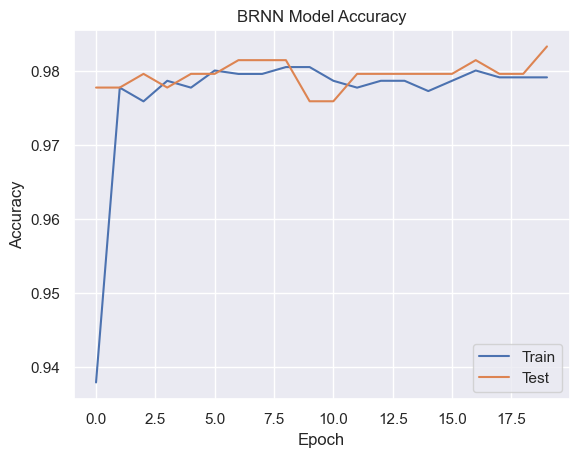

In [39]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
#plt.savefig('BRNN Model Accuracy.png')
plt.show()

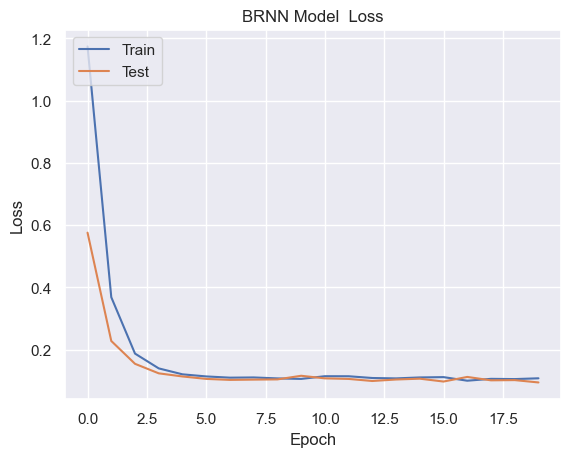

In [40]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BRNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN Model Loss.png')
plt.show()

In [41]:
%%time
predict = model.predict(X_test, verbose=1)

22/22 [==============================] - 3s 12ms/step
Wall time: 2.81 s


In [42]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

In [43]:
tp = 2512
tn = 843
fp = 143
fn = 148

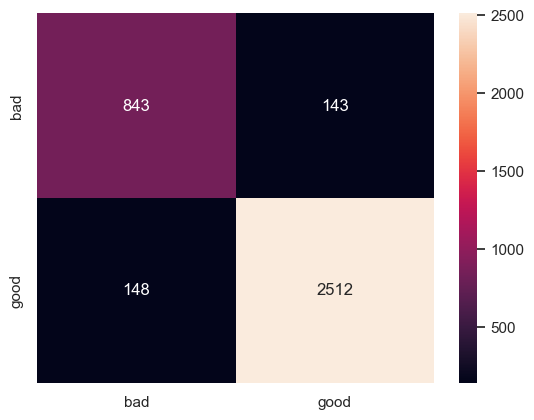

In [44]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["bad","good"],columns = ["bad","good"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")